## Data Preprocessing


In [69]:
# all libraries necessary for our analysis
import pandas as pd
import matplotlib.pyplot as mpl

In [72]:
# get read all necessary csv files
movies = pd.read_csv("./dataset/movies.csv")
ratings = pd.read_csv("./dataset/ratings.csv")

In [73]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
merged_df = pd.merge(movies, ratings, on="movieId",how='left')

In [ ]:
merged_df.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

In [ ]:
# count NaN (Not a number) values and drop them
nan_counts = merged_df.isnull().sum()
print("Number of NaN values per column:")
print(nan_counts)

merged_df_cleaned = merged_df.dropna()

print("\nBefore removing NaNs:", merged_df.shape)
print("After removing NaNs:", merged_df_cleaned.shape)

Number of NaN values per column:
movieId       0
title         0
genres        0
userId       18
rating       18
timestamp    18
dtype: int64

Before removing NaNs: (100854, 6)
After removing NaNs: (100836, 6)


In [ ]:
merged_df.drop(columns=['timestamp'])

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5
...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0
100850,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5
100851,193585,Flint (2017),Drama,184.0,3.5
100852,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5


In [ ]:
# fix order of columns
new_column_order = ['movieId', 'userId', 'rating', 'title', 'genres']
merged_df = merged_df.reindex(columns=new_column_order)
merged_df.head()

,movieId,userId,rating,title,genres
0,1,1.0,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,5.0,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,1,7.0,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,1,15.0,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,1,17.0,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
# seperate the year from the title column
merged_df['year'] = merged_df['title'].str.extract(r'\((\d{4})\)')
merged_df['title'] = merged_df['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)
merged_df.head()

,movieId,userId,rating,title,year,genres
0,1,1.0,4.0,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy
1,1,5.0,4.0,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy
2,1,7.0,4.5,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy
3,1,15.0,2.5,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy
4,1,17.0,4.5,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy


## Data Analysis and Discovery

In [ ]:
# get all the movies rated by user: 1
user_1 = merged_df[merged_df['userId'] == 1]
user_1.head()

,movieId,userId,rating,title,year,genres
0,1,1.0,4.0,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy
325,3,1.0,4.0,Grumpier Old Men,1995,Comedy|Romance
433,6,1.0,4.0,Heat,1995,Action|Crime|Thriller
2107,47,1.0,5.0,Seven (a.k.a. Se7en),1995,Mystery|Thriller
2379,50,1.0,5.0,"Usual Suspects, The",1995,Crime|Mystery|Thriller


In [ ]:
# get all movies user: 1 has rated a 5.0 star rating
user_1 = merged_df[(merged_df['userId'] == 1) & (merged_df['rating'] == 5.0)]
user_1.head()

,movieId,userId,rating,title,year,genres
2107,47,1.0,5.0,Seven (a.k.a. Se7en),1995,Mystery|Thriller
2379,50,1.0,5.0,"Usual Suspects, The",1995,Crime|Mystery|Thriller
3206,101,1.0,5.0,Bottle Rocket,1996,Adventure|Comedy|Crime|Romance
4254,151,1.0,5.0,Rob Roy,1995,Action|Drama|Romance|War
4458,157,1.0,5.0,Canadian Bacon,1995,Comedy|War


In [ ]:
# get a certain movie with certain rating
user = float(input("Enter user id: "))
rating = float(input("Enter rating: "))
result = merged_df[(merged_df['userId'] == user) & (merged_df['rating'] == rating)]
result.head()

Enter user id: 88.0
Enter rating: 3.0


,movieId,userId,rating,title,year,genres
52877,3255,88.0,3.0,"League of Their Own, A",1992,Comedy|Drama
78318,26974,88.0,3.0,Gummo,1997,Drama


# Data Visual 1: Bar plot of top 5 movies with the most 5 star rating

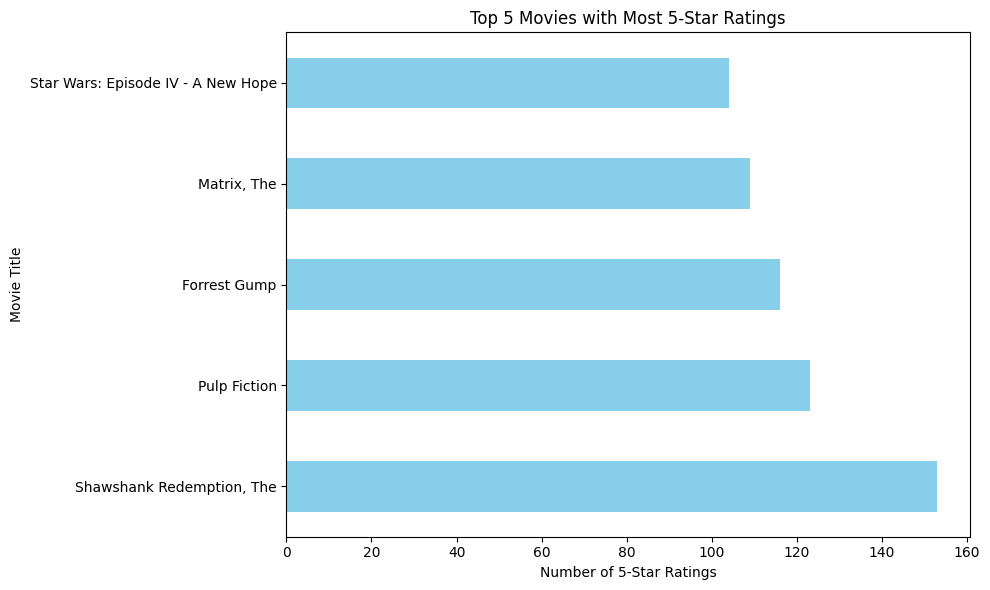

In [ ]:
# bar plot of top 5 movies with the most 5 star ratings
five_star_movies = merged_df[merged_df['rating'] == 5.0]
most_rated_five_star_movies = five_star_movies['title'].value_counts().head(5)

mpl.figure(figsize=(10, 6))
most_rated_five_star_movies.plot(kind='barh', color='skyblue')
mpl.xlabel('Number of 5-Star Ratings')
mpl.ylabel('Movie Title')
mpl.title('Top 5 Movies with Most 5-Star Ratings')
mpl.show()

# Data Visual 2: Line plot of variation of number of movies per year during the last 10 years (from 2009 till 2018)

In [ ]:
# get counts of movies produced each year and sort them by year
movies_per_year = merged_df['year'].value_counts().reset_index()
movies_per_year = movies_per_year.sort_values(by='year')
movies_per_year.head()

,year,count
99,1902,5
101,1903,2
105,1908,1
103,1915,1
100,1916,5


Text(0.5, 0, 'Year')

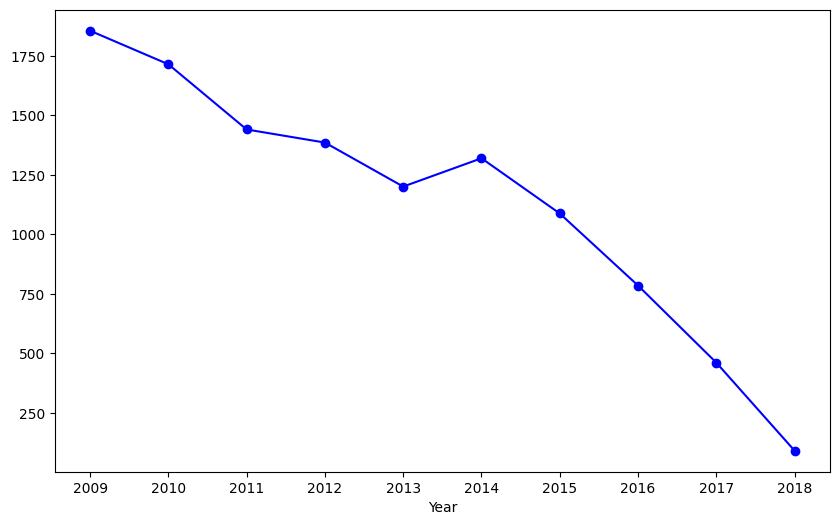

In [ ]:
# line plot of variation of number of movies of each year for the last 10 years
last_10_years = movies_per_year.tail(10)

mpl.figure(figsize=(10, 6))
mpl.plot(last_10_years['year'], last_10_years['count'], marker='o', linestyle='-', color='b')
mpl.xlabel('Year')

# Data Visual 3: Histogramme of range of ratings per user


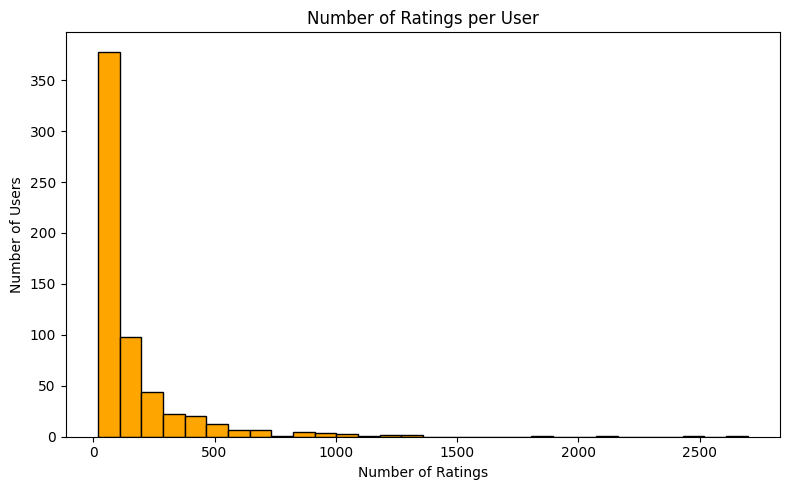

In [ ]:
user_rating_counts = merged_df['userId'].value_counts()
mpl.figure(figsize=(8,5))
mpl.hist(user_rating_counts, bins=30, color='orange', edgecolor='black')
mpl.title('Number of Ratings per User')
mpl.xlabel('Number of Ratings')
mpl.ylabel('Number of Users')
mpl.tight_layout()
mpl.show()

# Data Visual 4: Pie Chart of number of movies per genre

(np.float64(-1.0999974628062872),
 np.float64(1.099999866413869),
 np.float64(-1.099999998993502),
 np.float64(1.0999999999520715))

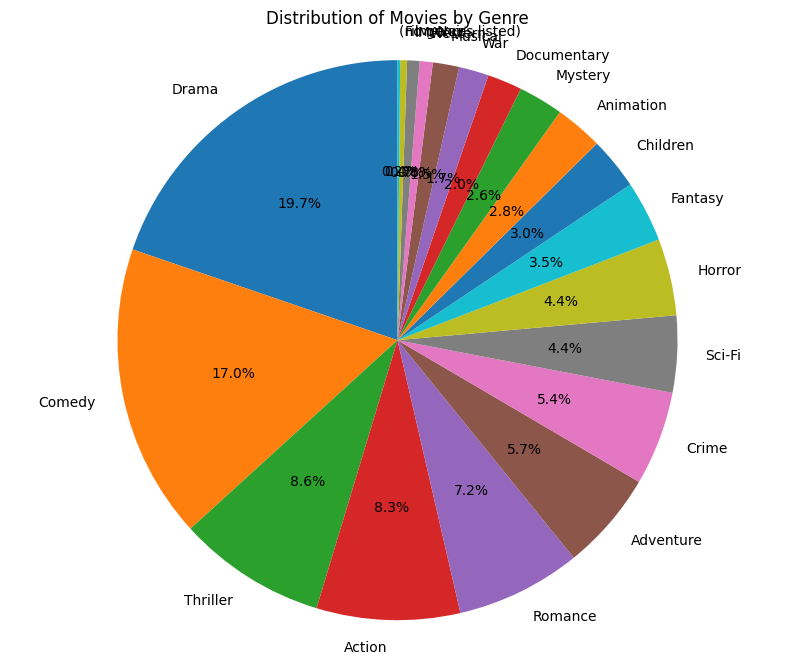

In [ ]:
movies_and_genres = merged_df[["movieId", "genres"]].drop_duplicates()
movies_and_genres['genres'] = movies_and_genres['genres'].str.split('|')
exploded_genres = movies_and_genres.explode('genres')
genre_counts = exploded_genres['genres'].value_counts()

mpl.figure(figsize=(10, 8))
mpl.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90)
mpl.title('Distribution of Movies by Genre')
mpl.axis('equal')